In [1]:
# https://docs.lightkurve.org/quickstart.html

# Quickstart

If you have a working version of Python installed on your system, it is easy to install Lightkurve and its dependencies using the ``pip`` package manager.  In a terminal window or Jupyter notebook cell, type:
```
! python -m pip install lightkurve --upgrade
```

See our [installation instructions](about/install.rst) page for details and troubleshooting information.

With Lightkurve installed, it is easy to extract brightness time series data (astronomers call this a *light curve*)
from the tiny images of stars collected by NASA's Kepler and TESS planet-hunting telescopes.

For example, let's download and display the pixels of a famous star named [KIC 8462852](https://en.wikipedia.org/wiki/KIC_8462852), also known as *Tabby's Star* or *Boyajian's Star*, which is known to show unusual light fluctuations.

First, we start Python and use the `search_targetpixelfile` function to obtain the Kepler pixel data for the star  from the [data archive](https://archive.stsci.edu/kepler/):

In [2]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download();

Next, let's display the first image in this data set:

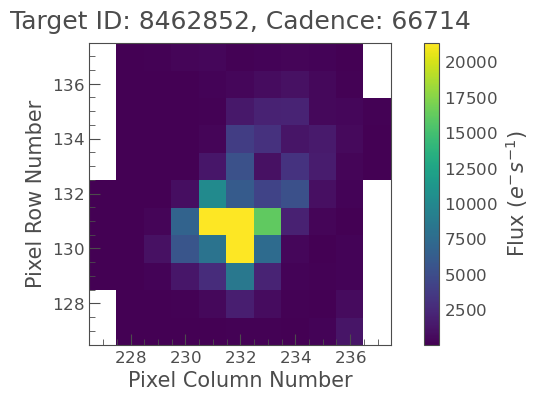

In [3]:
pixelfile.plot(frame=1);

It looks like the star is an isolated object, so we can extract a light curve by simply summing up all the pixel values in each image:

In [4]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

The above method returned a `LightCurve` object which gives us access to the number of photons received by the spacecraft over time (known as the *flux*).  The time is an [AstroPy Time object](https://docs.astropy.org/en/stable/time/) in units of *days*:

In [5]:
lc.time

<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.91762194 1557.9380561
 1557.95849016]>

The flux is an [AstroPy Quantity object](https://docs.astropy.org/en/stable/units/) in units *electrons/second*:

In [6]:
lc.flux

<Quantity [258645.03, 258660.05, 258690.08, ..., 258948.84, 258884.66,
           258865.6 ] electron / s>

We can plot these data using the `plot()` method:

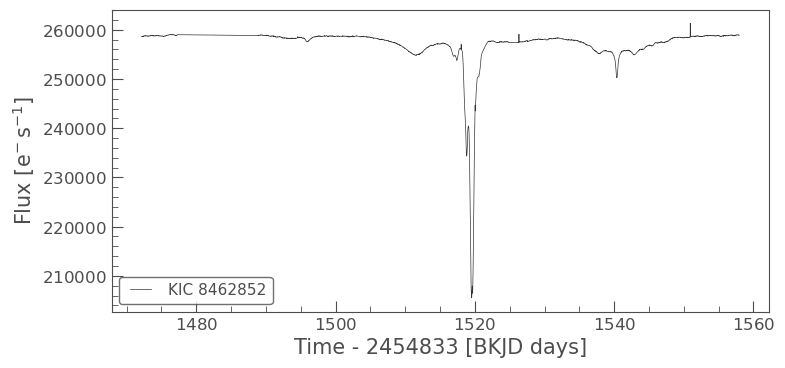

In [7]:
lc.plot();

The plot reveals a short-lived 20% dip in the brightness of the star.  It looks like we re-discovered one of the [intriguing dips in Tabby's star](https://en.wikipedia.org/wiki/KIC_8462852#Luminosity).

Congratulations, you are now able to make new discoveries in Kepler and TESS data!

Next, head to our [tutorials section](https://docs.lightkurve.org/tutorials) to be guided through more detailed examples of carrying out science with Lightkurve!